In [1]:
# Importing libraries.
from torch import nn, optim
import torch
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

In [2]:
# Custom classe.
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):

        out = self.linear(x)

        return out

In [3]:
# Dataset class.
class Data2D(Dataset):

    def __init__(self):

        self.x = torch.zeros(20,2) # Here the features are two.
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([[1.0], [1.0]]) # w is a vector of size number of features.
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1*torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    def __getitem__(self, index):

        return self.x[index], self.y[index]

    def __len__(self):

        return self.len


In [4]:
# We create objects for different classes.
data_set = Data2D()
criterian = nn.MSELoss()
trainloader = DataLoader(dataset=data_set, batch_size=2)
model = LR(input_size=2, output_size=1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [5]:
# Training is similar.
Cost = []
for epoch in range(100):
    for x, y in trainloader:

        yhat = model(x)
        loss = criterian(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    Cost.append(loss)

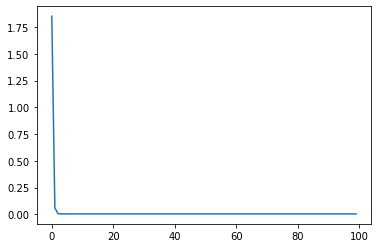

In [6]:
# Plotting cost curve.
plt.plot(range(100),Cost)
plt.show()